# Exercise 1.5 - Decision Tree (Using The Scaled Weather Data)

This script contains all code relating to building the Decision Tree Model for the Climate Wins Data as well as its evaluation:

1. Importing Libraries and Data
2. Data Manipulation for Model
3. Decision Tree & Evaluation

## 1. Importing Libraries and Data

In [1]:
# Import Libraries and Functions
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
# Create a path for data import

path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 1 - ClimateWins - Main\02 Data'

In [3]:
# Import Scaled Weather Data
climate = pd.read_csv(os.path.join(path, 'ClimateWins_Dataset_original.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
# Import Pleasant Weather Data
pleasant = pd.read_csv(os.path.join(path, 'Pleasant Weather Prediction Answers.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Manipulation for Model

Must First remove columns of unmatched weather stations

In [5]:
# Create list of columns for both dataframes:
climate_columns = climate.columns.to_list()
pleasant_columns = pleasant.columns.to_list()

In [6]:
# Obtain list of all weather stations names from pleasant weather:
pleasant_stations = [col.split('_')[0] for col in pleasant_columns if '_' in col]
pleasant_stations # Check

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [7]:
# Obtain column names from the climate_columns list where the stations are also in the pleasant_stations list
climate_stations = [col for col in climate_columns if col.split('_')[0] in pleasant_stations]
climate_stations # Check

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [8]:
# Subset Data from Climate DataFrame to only include the columns above that also relate to temp
filtered_columns = [col for col in climate_stations if col.split('_')[1].startswith('temp')]
climate_new = climate[filtered_columns]
climate_new.head() # Check

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,5.1,9.3,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,3.1,7.7,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,5.3,6.8,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,4.4,6.7,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,5.3,8.0,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4


In [9]:
# Create an 'X' matrix by dropping the unneeded columns.
X = climate_new
y = pleasant.drop(['DATE'], axis = 1)

# Check shape
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Check shape of training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


## 3. Decision Tree & Evaluation

[Text(0.3363139795204703, 0.984375, 'x[14] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.07081344595183516, 0.953125, 'x[29] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.020026073332094583, 0.921875, 'x[5] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.006992986466125437, 0.890625, 'x[23] <= 17.85\ngini = 0.004\nsamples = 6450\nvalue = [[6409, 41]\n[

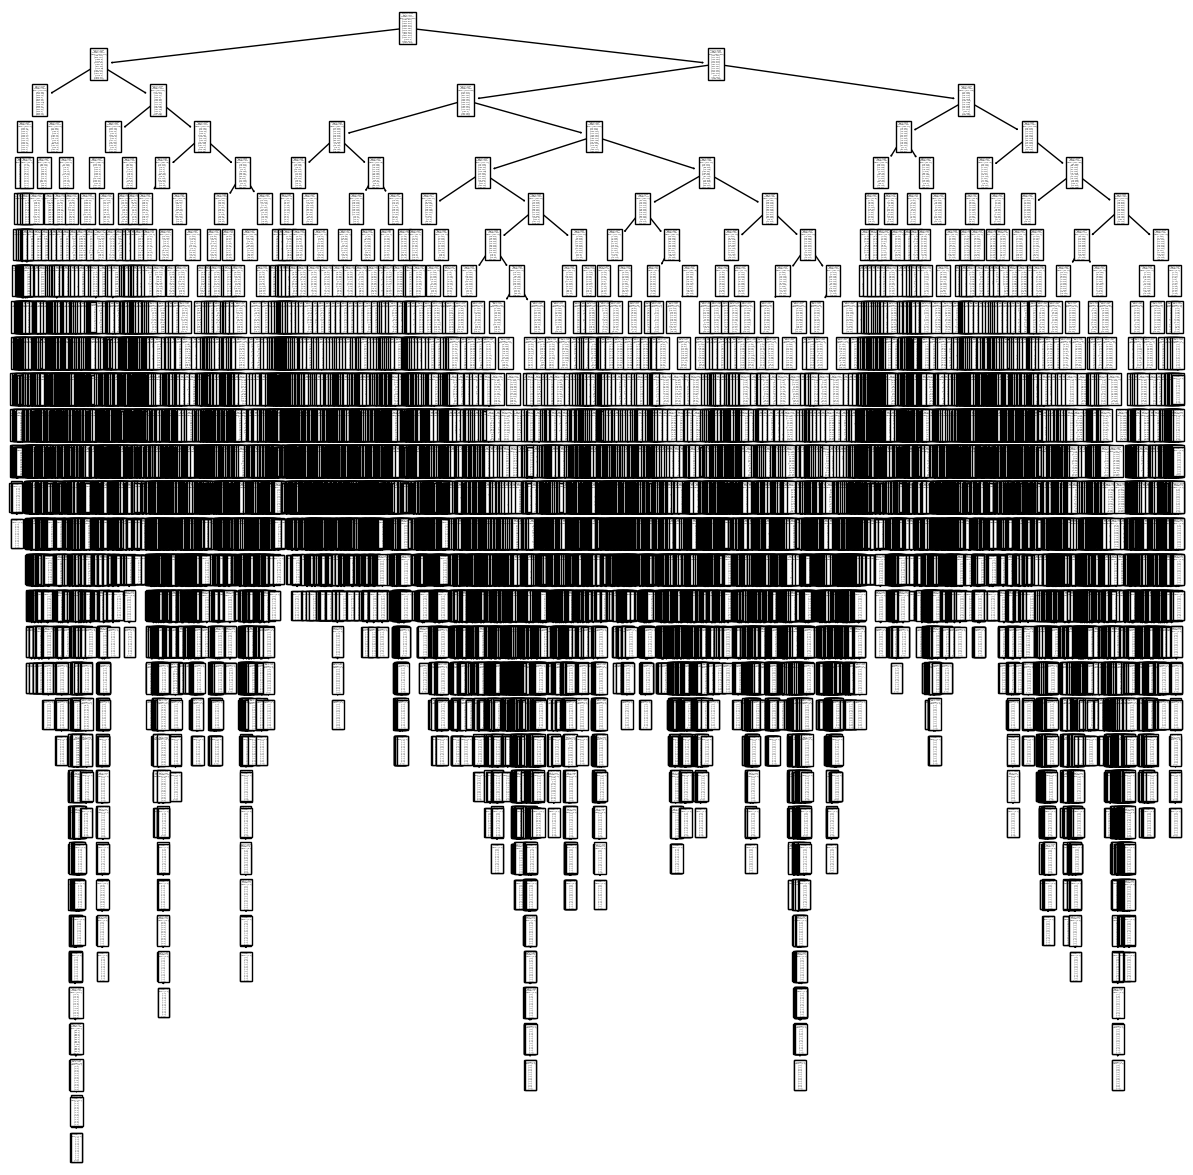

In [12]:
# Run Decision Tree classifier
climate_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climate_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(climate_dt)

In [13]:
# Cross Validation Method (Determine Accuracy for Training Data)
y_pred_train = climate_dt.predict(X_train)
print('Train accuracy score: ', accuracy_score(y_train, y_pred_train))

Train accuracy score:  1.0


In [14]:
# Cross Validation Method (Determine Accuracy for Testing Data)
y_pred = climate_dt.predict(X_test)
print('Test accuracy score: ', accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.4740327640292785


array([[[3849,  489],
        [ 417,  983]],

       [[3209,  567],
        [ 540, 1422]],

       [[3396,  504],
        [ 513, 1325]],

       [[4289,  348],
        [ 346,  755]],

       [[4116,  391],
        [ 391,  840]],

       [[4081,  489],
        [ 420,  748]],

       [[4490,  325],
        [ 335,  588]],

       [[3663,  532],
        [ 457, 1086]],

       [[4159,  403],
        [ 381,  795]],

       [[2813,  355],
        [ 365, 2205]],

       [[4162,  384],
        [ 380,  812]],

       [[4561,  318],
        [ 322,  537]],

       [[5738,    0],
        [   0,    0]],

       [[4433,  333],
        [ 359,  613]],

       [[5312,  150],
        [ 177,   99]]], dtype=int64)

In [15]:
# Code for Confusion Matrix
locations = list({x.split("_")[0] for x in climate_new.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

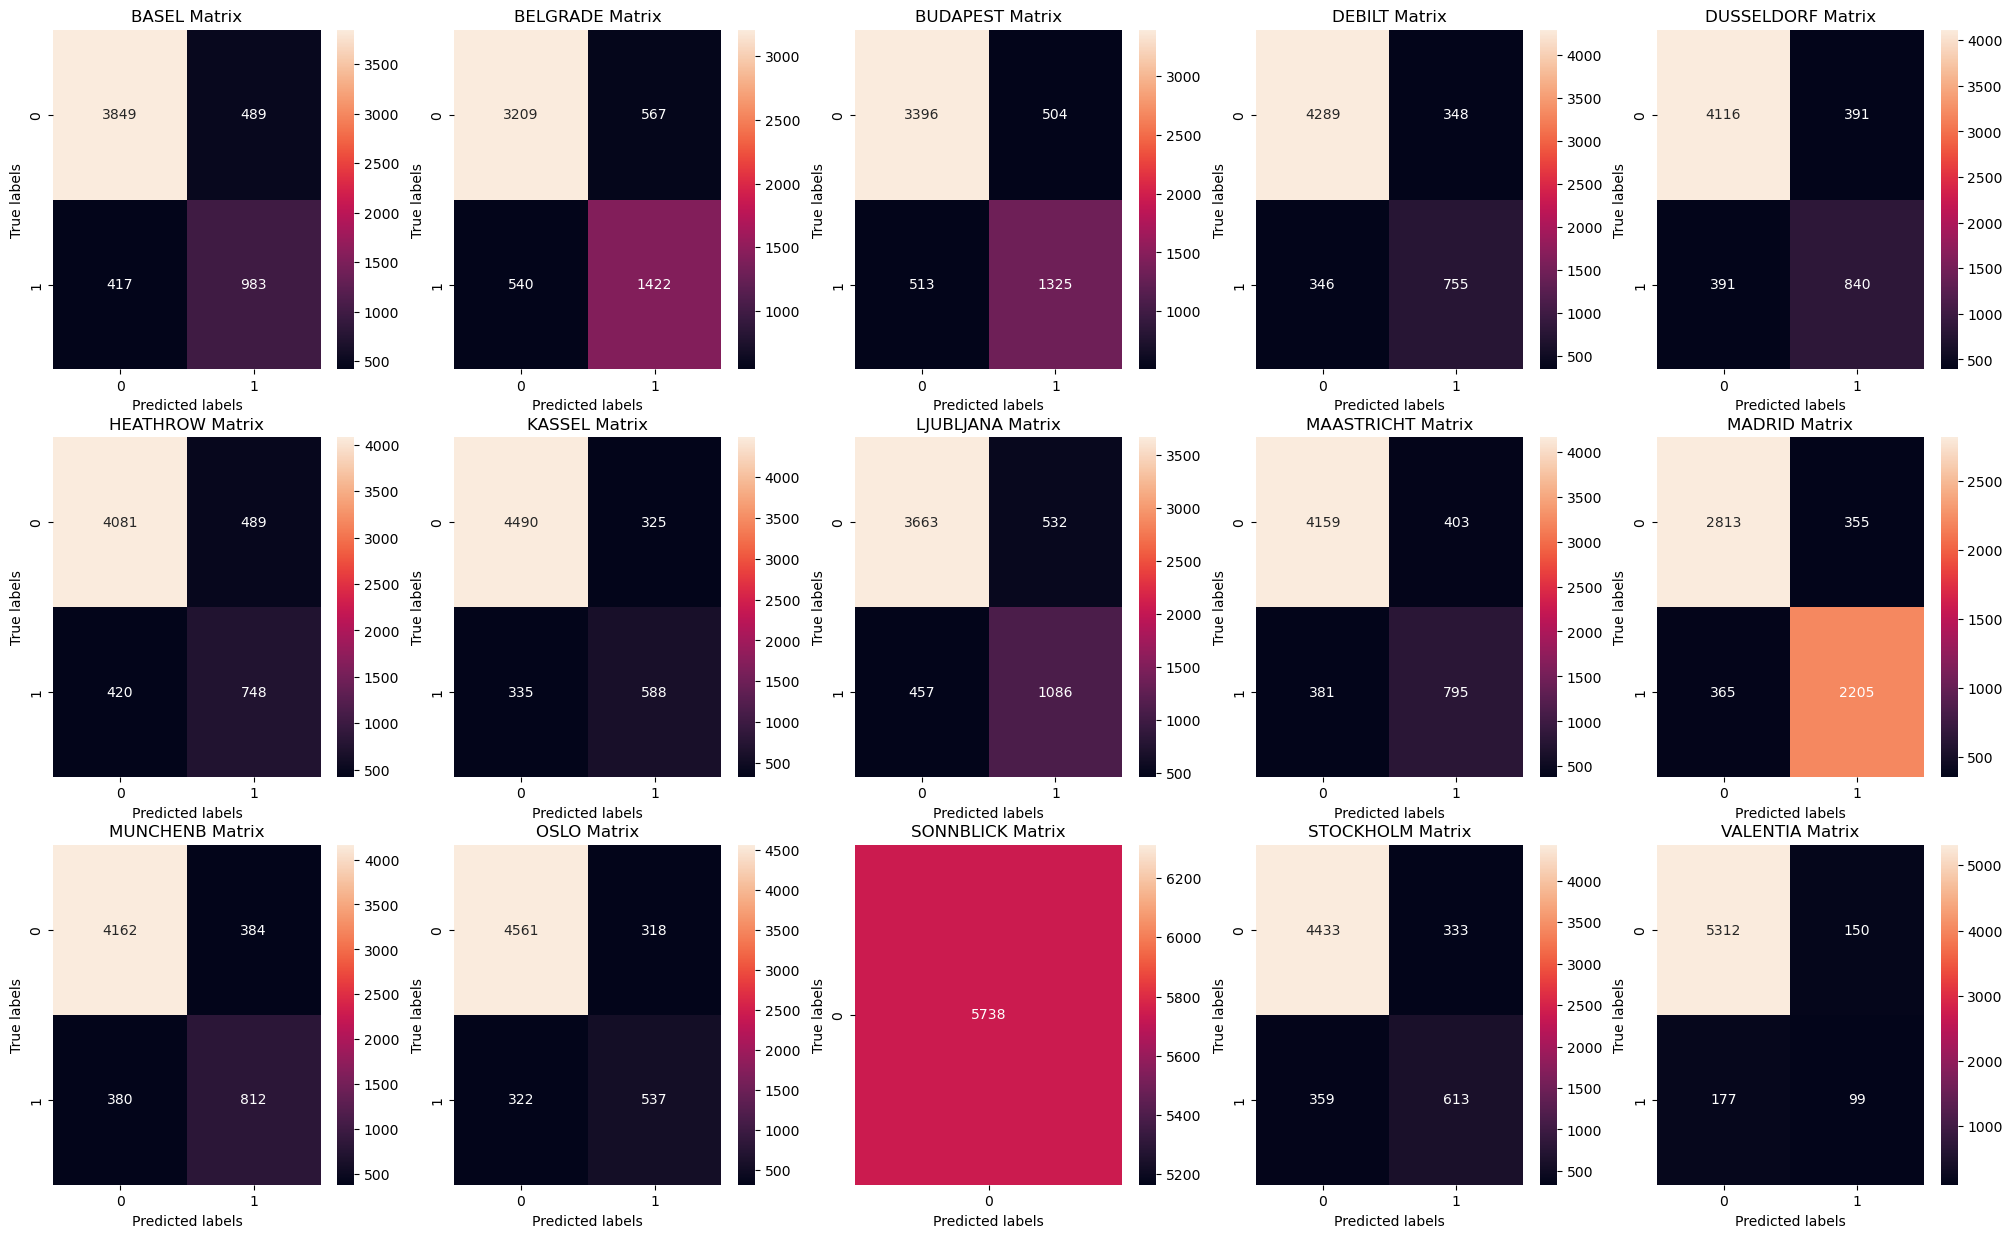

In [16]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

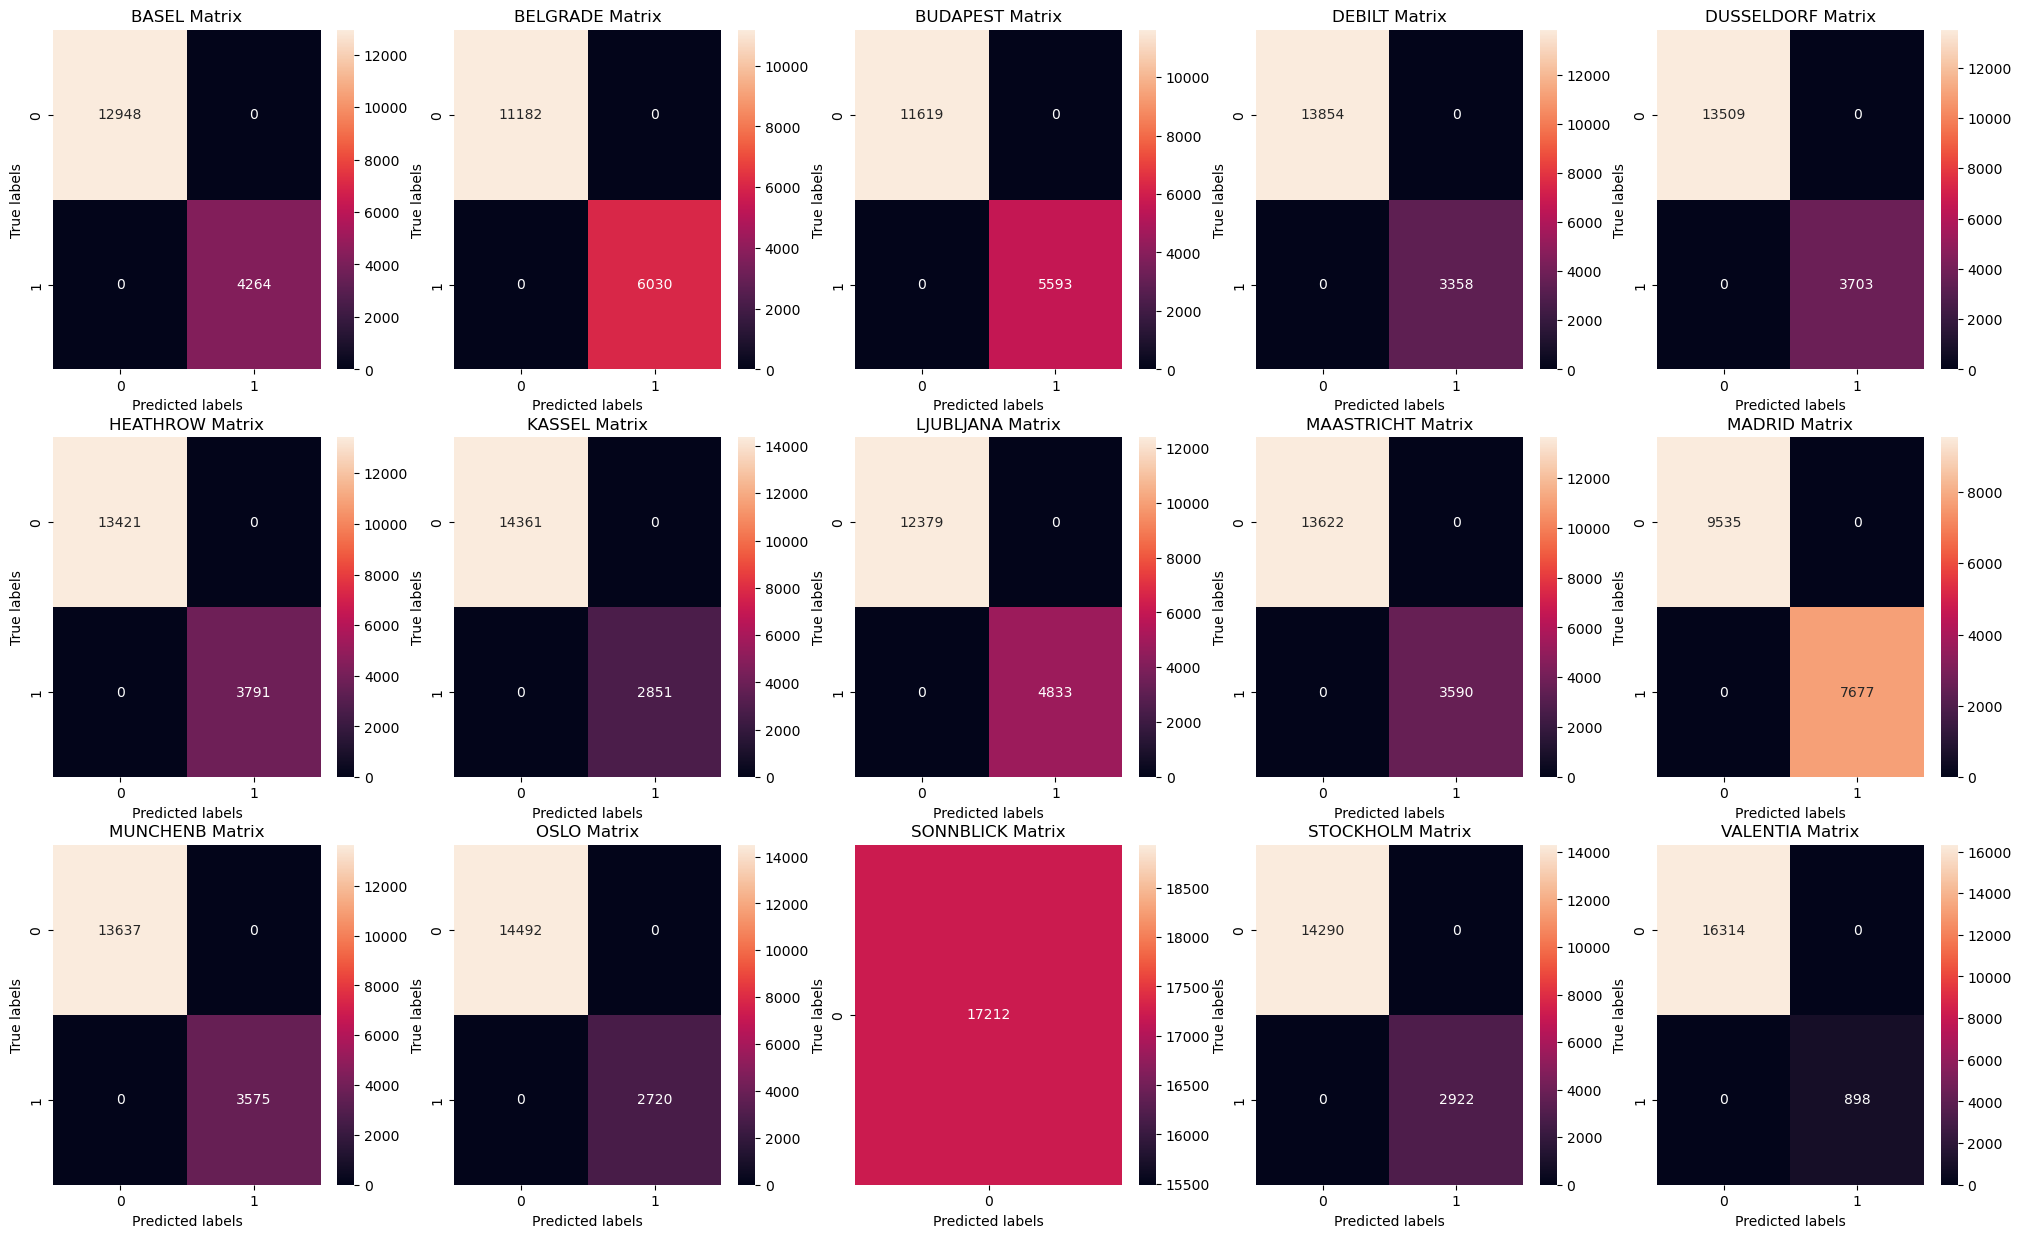

In [17]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## Additional Work

Calculated Accuracy for BASEL: 1.0
Calculated Accuracy for BELGRADE: 1.0
Calculated Accuracy for BUDAPEST: 1.0
Calculated Accuracy for DEBILT: 1.0
Calculated Accuracy for DUSSELDORF: 1.0
Calculated Accuracy for HEATHROW: 1.0
Calculated Accuracy for KASSEL: 1.0
Calculated Accuracy for LJUBLJANA: 1.0
Calculated Accuracy for MAASTRICHT: 1.0
Calculated Accuracy for MADRID: 1.0
Calculated Accuracy for MUNCHENB: 1.0
Calculated Accuracy for OSLO: 1.0
Calculated Accuracy for SONNBLICK: 1.0
Calculated Accuracy for STOCKHOLM: 1.0
Calculated Accuracy for VALENTIA: 1.0
Average Accuracy across all matrices: 1.0


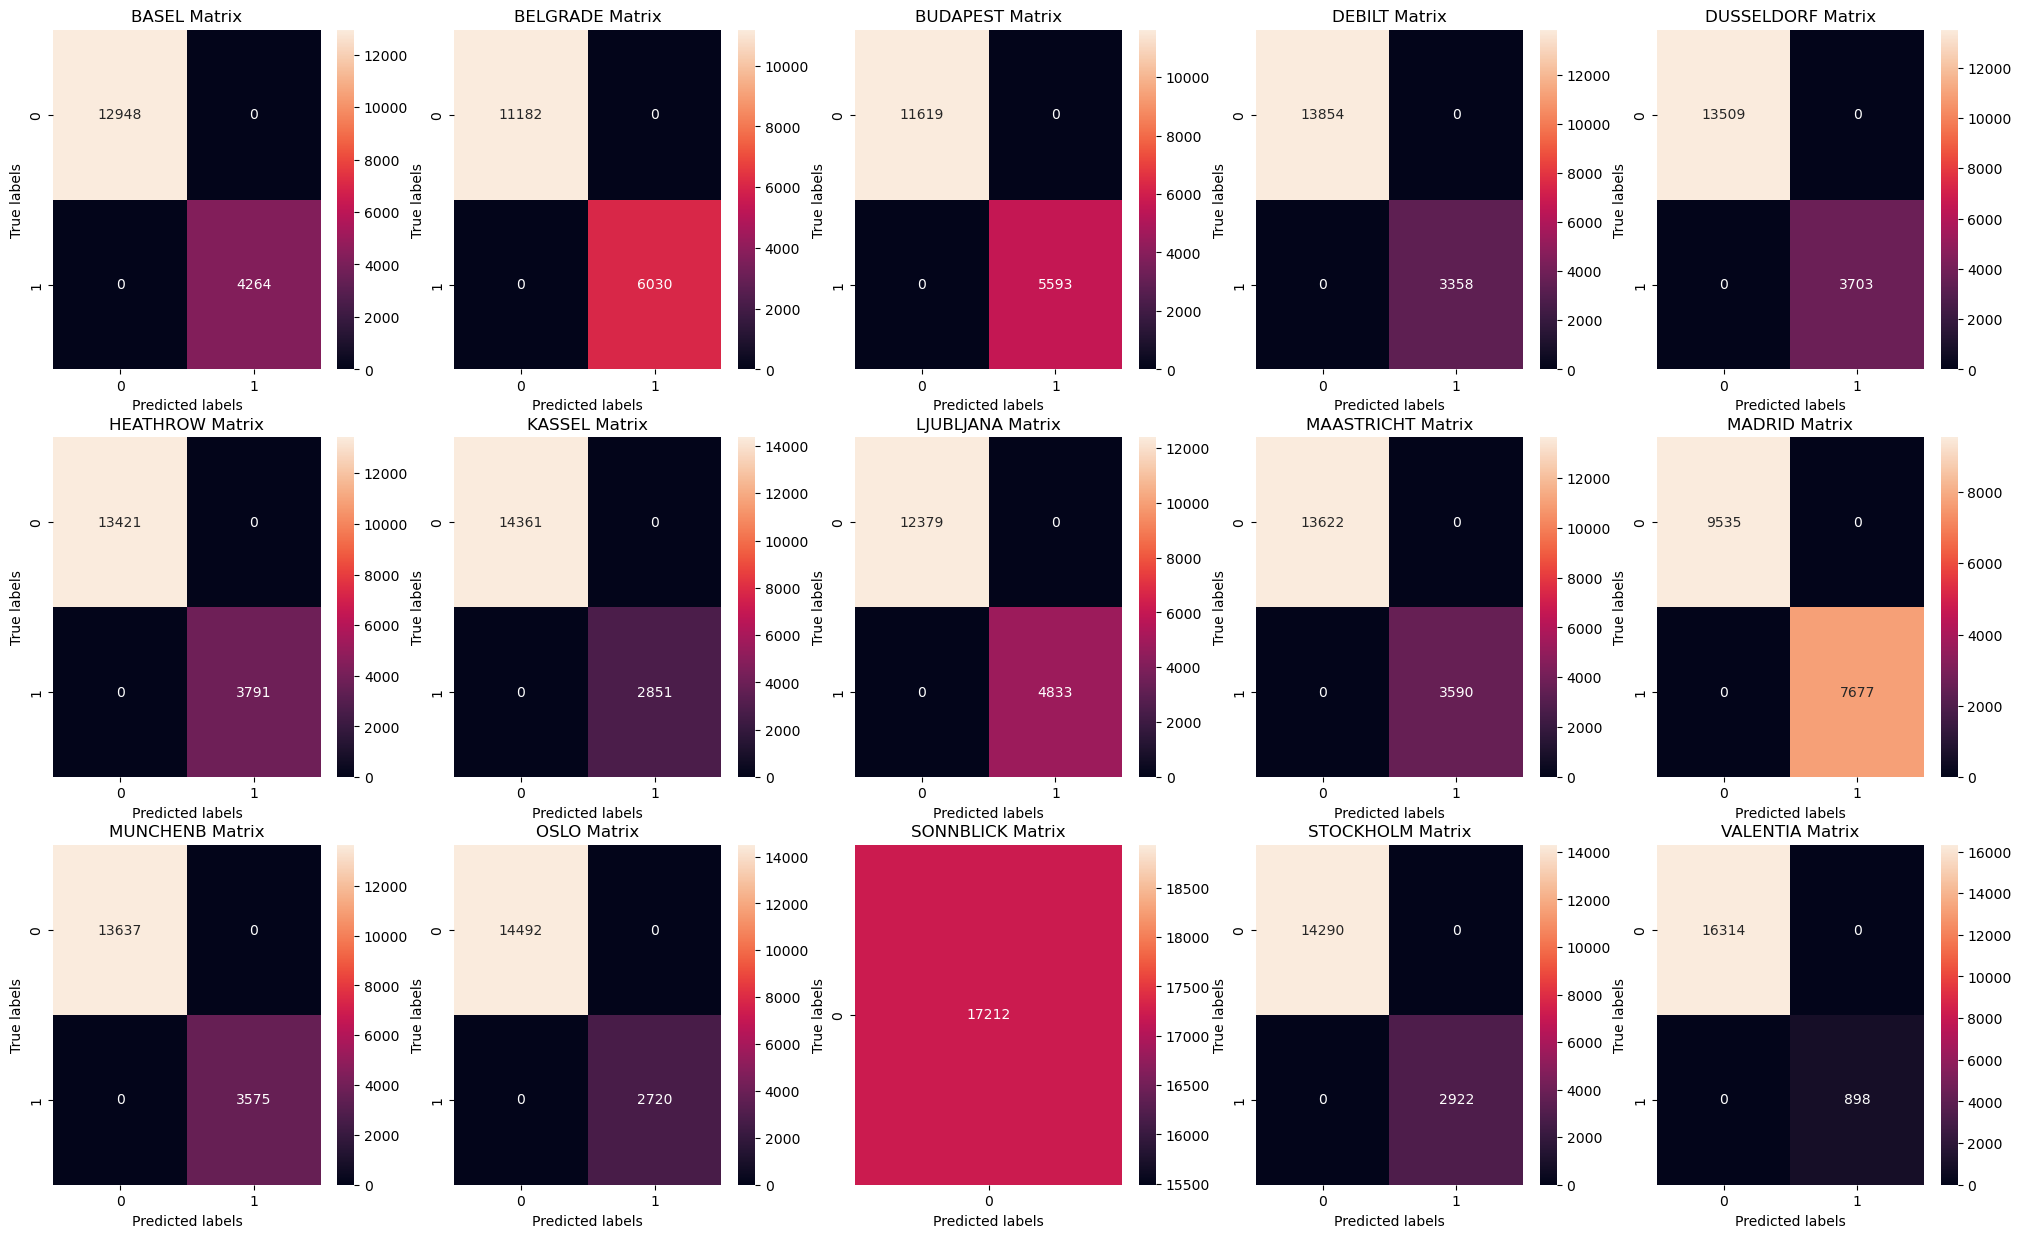

In [18]:
# Confusion Matrix for train data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']   
count = 0
all_accuracies = []  # List to store all accuracy values

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:, name + key], y_pred_train[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        # You can use these lines if you want custom tick labels; remove them if not needed
        # ax[i, j].xaxis.set_ticklabels(labels)
        # ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1
        
        # Handle different shapes of confusion matrix
        if cm.shape == (2, 2):  # Standard case with TP, TN, FP, FN
            TN, FP, FN, TP = cm.ravel()
        elif cm.shape == (1, 1):  # Only TP or TN, but no other elements
            TP = cm[0, 0]
            TN = FP = FN = 0
        elif cm.shape == (1, 2):  # Only TP and FP
            TP = cm[0, 0]
            FP = cm[0, 1]
            TN = FN = 0
        elif cm.shape == (2, 1):  # Only TN and FN
            TN = cm[0, 0]
            FN = cm[1, 0]
            TP = FP = 0
        
        # Calculate accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
        all_accuracies.append(accuracy)  # Store the accuracy

        print(f"Calculated Accuracy for {name}:", accuracy)

# Calculate and print the average accuracy across all matrices
average_accuracy = sum(all_accuracies) / len(all_accuracies) if all_accuracies else 0
print(f"Average Accuracy across all matrices: {average_accuracy}")

Calculated Accuracy for BASEL: 0.8421052631578947
Calculated Accuracy for BELGRADE: 0.8070756361101429
Calculated Accuracy for BUDAPEST: 0.8227605437434646
Calculated Accuracy for DEBILT: 0.8790519344719414
Calculated Accuracy for DUSSELDORF: 0.8637155803415825
Calculated Accuracy for HEATHROW: 0.8415824329034507
Calculated Accuracy for KASSEL: 0.8849773440223074
Calculated Accuracy for LJUBLJANA: 0.8276402927849424
Calculated Accuracy for MAASTRICHT: 0.8633670268386198
Calculated Accuracy for MADRID: 0.8745207389334263
Calculated Accuracy for MUNCHENB: 0.8668525618682468
Calculated Accuracy for OSLO: 0.8884628790519344
Calculated Accuracy for SONNBLICK: 1.0
Calculated Accuracy for STOCKHOLM: 0.8794004879749041
Calculated Accuracy for VALENTIA: 0.9430115022655978
Average Accuracy across all matrices: 0.8723016149645637


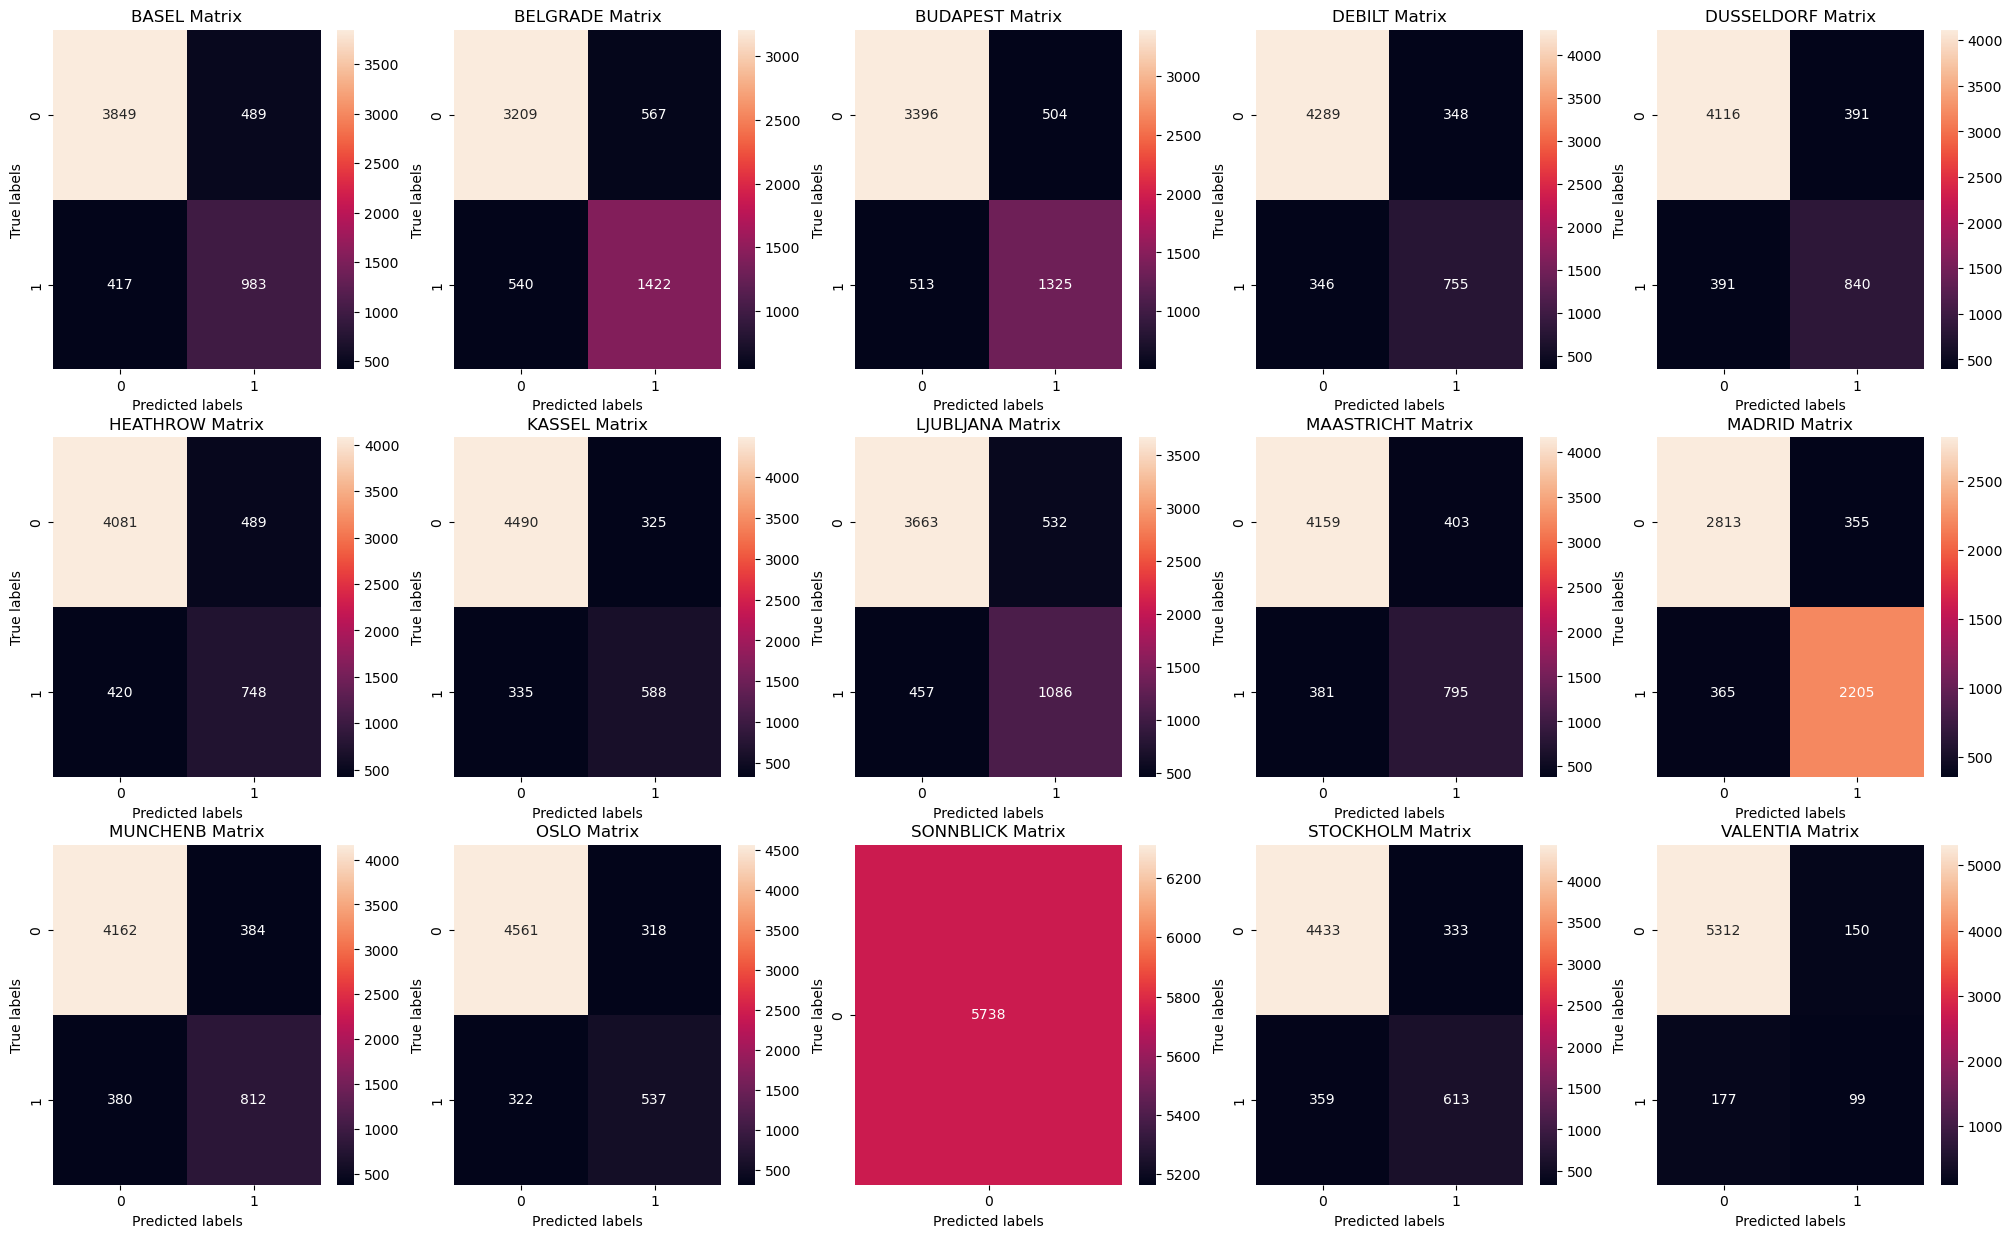

In [19]:
# Confusion Matrix for test data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']   
count = 0
all_accuracies = []  # List to store all accuracy values

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        # You can use these lines if you want custom tick labels; remove them if not needed
        # ax[i, j].xaxis.set_ticklabels(labels)
        # ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1
        
        # Handle different shapes of confusion matrix
        if cm.shape == (2, 2):  # Standard case with TP, TN, FP, FN
            TN, FP, FN, TP = cm.ravel()
        elif cm.shape == (1, 1):  # Only TP or TN, but no other elements
            TP = cm[0, 0]
            TN = FP = FN = 0
        elif cm.shape == (1, 2):  # Only TP and FP
            TP = cm[0, 0]
            FP = cm[0, 1]
            TN = FN = 0
        elif cm.shape == (2, 1):  # Only TN and FN
            TN = cm[0, 0]
            FN = cm[1, 0]
            TP = FP = 0
        
        # Calculate accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
        all_accuracies.append(accuracy)  # Store the accuracy

        print(f"Calculated Accuracy for {name}:", accuracy)

# Calculate and print the average accuracy across all matrices
average_accuracy = sum(all_accuracies) / len(all_accuracies) if all_accuracies else 0
print(f"Average Accuracy across all matrices: {average_accuracy}")